Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: RCurl

Loading required package: foreign

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.1     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::complete() masks RCurl::complete()
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()



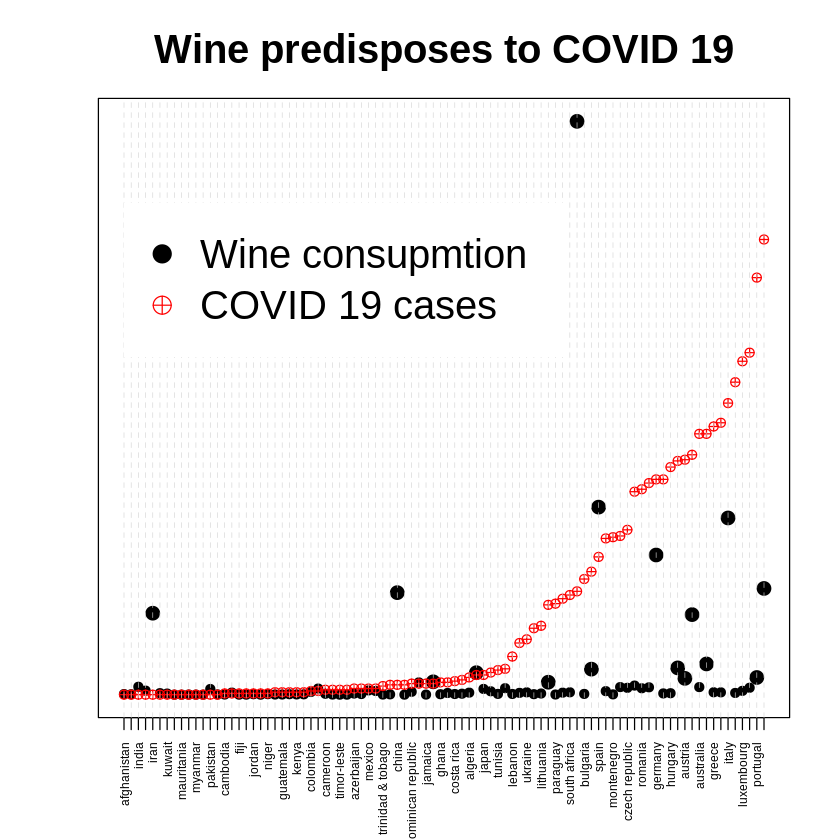

In [1]:
# This is a joke - not intended to be thoughtful!

install.packages("RCurl")
install.packages("tidyverse")

require(RCurl)
require(foreign)
require(tidyverse) 
x = getURL("https://raw.githubusercontent.com/RInterested/PLOTS/master/drinks_csv.csv")

data <- read.csv(textConnection(x))
data <- data[,c(1:5,8)]


interest <- c(1,2,3,7,9,10,11,14,16,17,21,24,26,29,30,31,34,35,36,38,
              39,40,42,44,47,48,49,50,55,57,61,62,63,65,69,70,71,72,
              73,74,75,76,77,78,79,80,81,82,83,84,85,89,91,92,93,94,
              100,102,103,104,105,106,108,110,111,112,113,114,115,116,
              118,119,121,122,125,126,127,134,141,142,143,144,152,154,
              155,158,159,160,162,169)

data <- data[interest,]
data <- droplevels(data)
data <- data[with(data, order(data$wine_servings)),]
row.names(data) <- 1:nrow(data)


plot(1:nrow(data),data$cases,las=2, xlab="", ylab="", xaxt = 'n', yaxt = 'n', 
     cex = ifelse(data$cases>10000,1.5,1),
     pch = 19,
     main="Wine predisposes to COVID 19", cex.main=2)
axis(1, at = 1:length(data$country), labels = as.character(data$country), cex.axis = 0.6,las = 2)


points(1:nrow(data), 1000*data$wine_servings, col = 2, 
       pch=10)
abline(v=seq(1,length(data$country),1), lty=2, lwd=0.5, col="light gray")

legend(1, 400000,
       legend=c("Wine consupmtion", "COVID 19 cases"),
       col=c(1,2), pch=c(19,10), cex=2,
       box.lty=0)    